`# TODO:`

* Documentation of this notebook


In [1]:
import pandas as pd
from gaishap import GenAIExplainer
import shap
import matplotlib.pyplot as plt

In [2]:
shap.initjs()

In [3]:
df_test_dataset = pd.read_json('./test-dataset.json', orient='records')
df_features = pd.read_json('./test-features.json', orient='records')
df_test_dataset.join(df_features)

,user_input,retrieved_contexts,response,reference,faithfulness,context_precision,context_recall,there_is_any_person_identified_in_the_question,list_of_people_identified_in_the_question,there_is_any_technology_or_programming_language_identified_in_the_question,list_of_technologies_or_programming_languages_identified_in_the_question,there_is_any_company_or_organization_identified_in_the_question,list_of_companies_or_organizations_identified_in_the_question,is_a_question_about_personal_experiences_or_decisions,is_a_question_about_technological_innovations_or_developments,is_a_question_about_artistic_or_creative_processes,is_a_question_about_business_or_startup_strategies,is_a_question_about_educational_or_learning_experiences,is_a_question_related_to_the_concept_of_invention_vs_discovery
0,"In the essay, the author mentions his early ex...",[What I Worked On\n\nFebruary 2021\n\nBefore c...,The first computer the author used for program...,The first computer the author used for program...,1.000000,1.0,1.000000,True,[author],True,[programming],False,[],True,False,False,False,True,False
1,The author switched his major from philosophy ...,[What I Worked On\n\nFebruary 2021\n\nBefore c...,The author developed an interest in AI due to ...,The two specific influences that led the autho...,1.000000,1.0,1.000000,True,[author],True,[AI],False,[],True,True,False,False,True,False
2,"In the essay, the author discusses his initial...",[All that seemed left for philosophy were edge...,The author's initial interest in AI was influe...,The two main influences that initially drew th...,1.000000,1.0,1.000000,True,[author],True,[AI],False,[],True,True,False,False,True,False
3,The author mentions his shift of interest towa...,[All that seemed left for philosophy were edge...,The author shifted his interest towards Lisp b...,The author shifted his interest towards Lisp a...,1.000000,1.0,1.000000,True,[author],True,[Lisp],False,[],True,True,False,False,True,False
4,"In the essay, the author mentions his interest...","[Its brokenness did, as so often happens, gene...","During his time in grad school, the author att...","The author in the essay is Paul Graham, who wa...",0.642857,1.0,0.866667,True,[author],False,[],False,[],True,False,True,False,True,False
5,The author discusses his decision to write a b...,[All that seemed left for philosophy were edge...,The author decided to write a book on Lisp hac...,The author decided to write a book on Lisp hac...,0.615385,1.0,1.000000,True,[author],True,[Lisp],False,[],True,True,False,False,True,False
6,"In the essay, the author mentions a quick deci...","[Its brokenness did, as so often happens, gene...",The author made a quick decision to attempt to...,The author decided to attempt writing his diss...,1.000000,0.5,1.000000,True,[author],False,[],False,[],True,False,False,False,True,False
7,The author describes the atmosphere and practi...,[If he even knew about the strange classes I w...,The author describes the atmosphere at the Acc...,"According to the author's account, the student...",1.000000,1.0,1.000000,True,[author],False,[],True,[Accademia di Belli Arti],True,False,True,False,True,False
8,"In the essay, the author discusses his experie...",[The students and faculty in the painting depa...,The author describes painting still lives as d...,"In the essay, the author explains that paintin...",0.916667,1.0,1.000000,True,[author],False,[],False,[],True,False,True,False,True,False
9,The author shares his work experience at a com...,[The students and faculty in the painting depa...,Interleaf had added a unique feature to their ...,"Interleaf, the company where the author worked...",0.500000,0.0,0.571429,True,[author],False,[],True,[Interleaf],True,True,False,False,False,False


In [4]:
%skip
heading_properties = [('font-size', '8px')]

cell_properties = [('font-size', '8px')]

dfstyle = [dict(selector="th", props=heading_properties),\
 dict(selector="td", props=cell_properties)]

df = df_test_dataset.join(df_features)[[
    'user_input',
    'retrieved_contexts',
    'response',
    'reference',
    'faithfulness', 
    'context_precision', 
    'context_recall', 
    #'list_of_technologies_or_programming_languages_identified_in_the_question',
    #'list_of_companies_or_organizations_identified_in_the_question',
    #'is_a_question_about_artistic_or_creative_processes'
]].head(10)

df.style.set_table_styles(dfstyle)

UsageError: Line magic function `%skip` not found.


In [6]:
gai_explainer = GenAIExplainer.from_pandas(df_test_dataset, df_features)

In [7]:
gai_explainer.feature_engineering()
X = pd.DataFrame(gai_explainer.preprocessed_features)
pd.DataFrame(gai_explainer.metrics).join(X)

,faithfulness,context_precision,context_recall,there_is_any_person_identified_in_the_question,list_of_people_identified_in_the_question__robert_morris,list_of_people_identified_in_the_question__jessica,list_of_people_identified_in_the_question__paul_graham,list_of_people_identified_in_the_question__author,there_is_any_technology_or_programming_language_identified_in_the_question,list_of_technologies_or_programming_languages_identified_in_the_question__programming,...,list_of_companies_or_organizations_identified_in_the_question__hacker_news,list_of_companies_or_organizations_identified_in_the_question__yc,list_of_companies_or_organizations_identified_in_the_question__y_combinator,list_of_companies_or_organizations_identified_in_the_question__summer_founders_program,is_a_question_about_personal_experiences_or_decisions,is_a_question_about_technological_innovations_or_developments,is_a_question_about_artistic_or_creative_processes,is_a_question_about_business_or_startup_strategies,is_a_question_about_educational_or_learning_experiences,is_a_question_related_to_the_concept_of_invention_vs_discovery
0,1.000000,1.0,1.000000,1.0,0.0,0.0,0.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,1.000000,1.0,1.000000,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
2,1.000000,1.0,1.000000,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
3,1.000000,1.0,1.000000,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
4,0.642857,1.0,0.866667,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
5,0.615385,1.0,1.000000,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
6,1.000000,0.5,1.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
7,1.000000,1.0,1.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
8,0.916667,1.0,1.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
9,0.500000,0.0,0.571429,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0


In [8]:
gai_explainer.create_explainers()

Metric loop:   0%|          | 0/3 [00:00<?, ?it/s]

faithfulness:   0%|          | 0/3 [00:00<?, ?it/s]

/workspace/src/gaishap/explainer.py:297: UserWarning: There are 8 estimated values in the metric faithfulness too farm from the original values. The following is the list of indexes [3, 4, 5, 8, 18, 19, 39, 40].
  warnings.warn(


context_precision:   0%|          | 0/3 [00:00<?, ?it/s]

/workspace/src/gaishap/explainer.py:297: UserWarning: There are 20 estimated values in the metric context_precision too farm from the original values. The following is the list of indexes [4, 8, 11, 13, 14, 15, 20, 21, 25, 26, 28, 30, 32, 35, 36, 37, 38, 39, 40, 42].
  warnings.warn(


context_recall:   0%|          | 0/3 [00:00<?, ?it/s]

/workspace/src/gaishap/explainer.py:297: UserWarning: There are 21 estimated values in the metric context_recall too farm from the original values. The following is the list of indexes [6, 8, 9, 10, 11, 12, 13, 14, 15, 19, 21, 23, 25, 26, 28, 32, 35, 36, 37, 38, 41].
  warnings.warn(


In [8]:
gai_explainer.r2_scores_

{'faithfulness': 0.9178350799481703,
 'context_precision': 0.8937264838587169,
 'context_recall': 0.9002238340620393}

In [11]:
metric = 'faithfulness'

X = pd.DataFrame(gai_explainer.preprocessed_features)
metric_explainer = gai_explainer.explainers_[metric]
shap_values = metric_explainer(X)

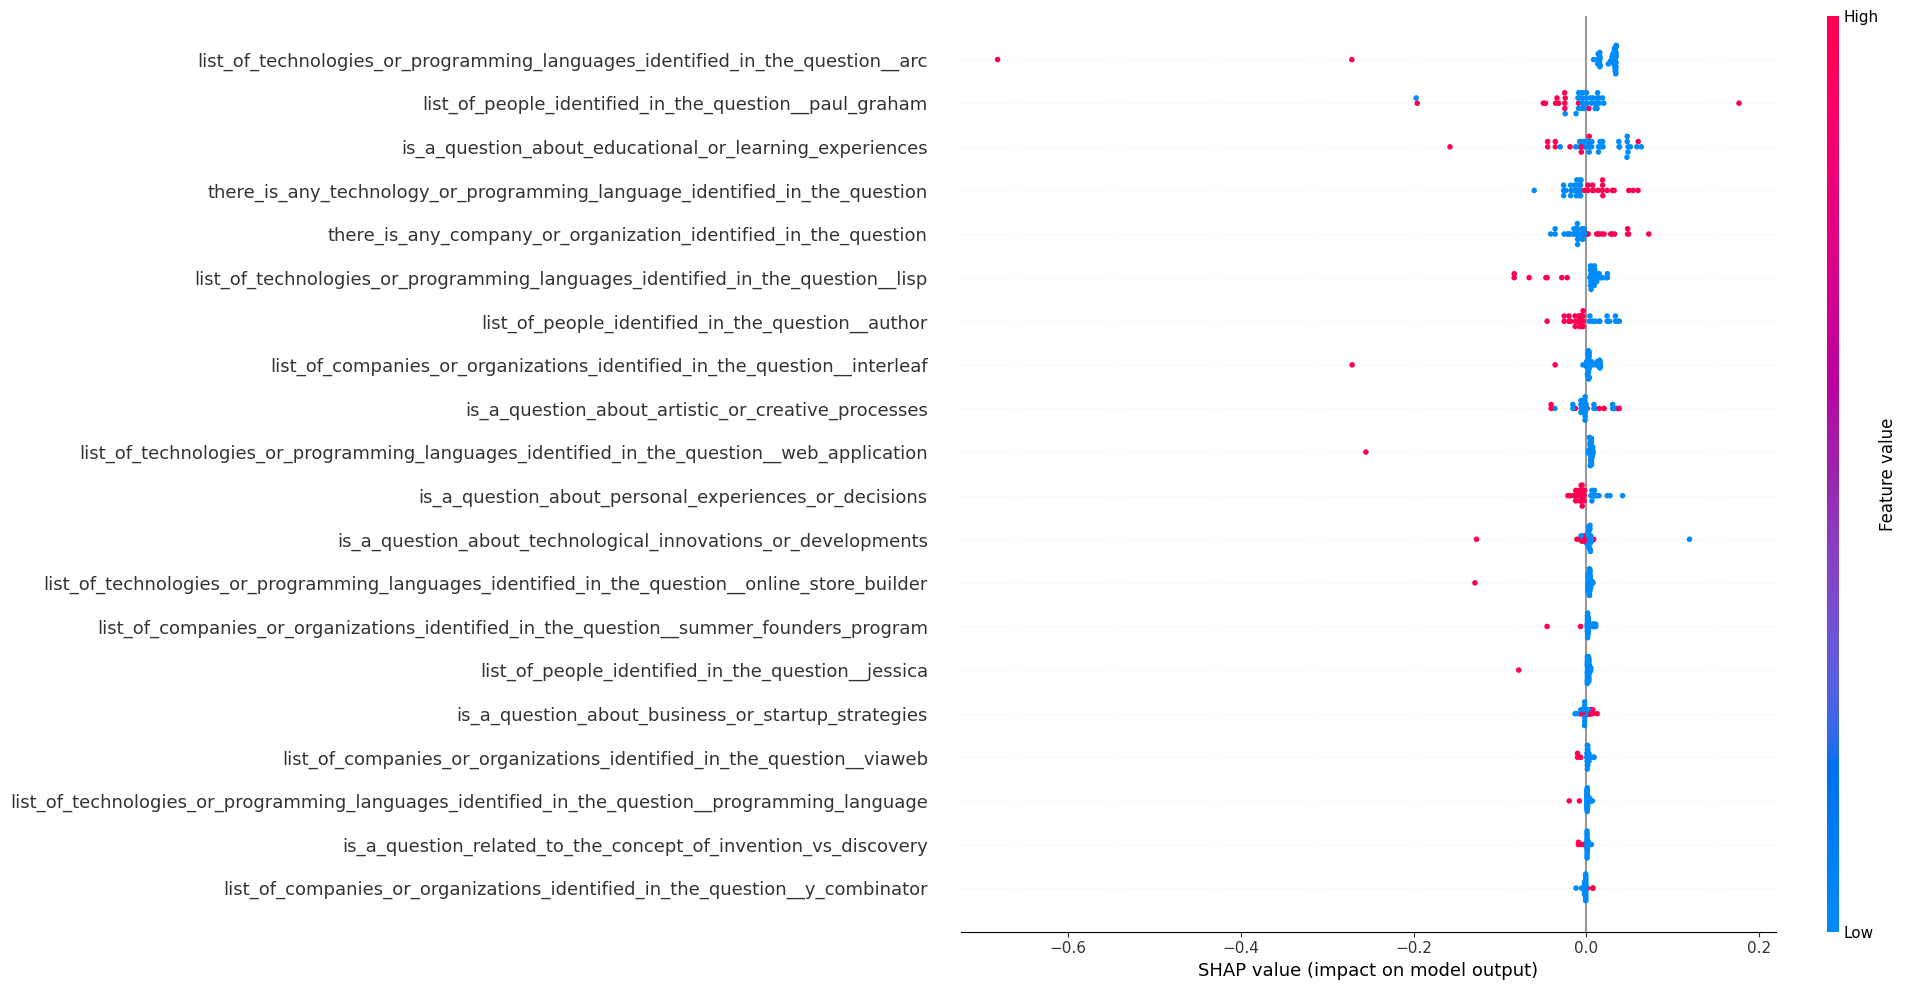

In [12]:
shap.summary_plot(shap_values, X, plot_size=(20,10))

In [21]:
df_metric = pd.DataFrame(gai_explainer.metrics)[[metric]]
df_metric['estimated_value'] = gai_explainer.estimators_[metric].predict(X)
df_metric['is_out_of_range'] = gai_explainer.is_out_of_range_[metric]

heading_properties = [('font-size', '8px')]

cell_properties = [('font-size', '8px')]

dfstyle = [dict(selector="th", props=heading_properties),\
 dict(selector="td", props=cell_properties)]

df_small_font = df_metric.style.set_table_styles(dfstyle)

df_metric.style.apply(
    lambda s : [
        'background-color: yellow' if s.loc['is_out_of_range'] else '' for v in s.index
    ], axis=1).set_table_styles(dfstyle)

,faithfulness,estimated_value,is_out_of_range
0,1.000000,1.000168,False
1,1.000000,0.999896,False
2,1.000000,0.999896,False
3,1.000000,0.807790,True
4,0.642857,0.780109,True
5,0.615385,0.807790,True
6,1.000000,0.998454,False
7,1.000000,0.999267,False
8,0.916667,0.780109,True
9,0.500000,0.501968,False


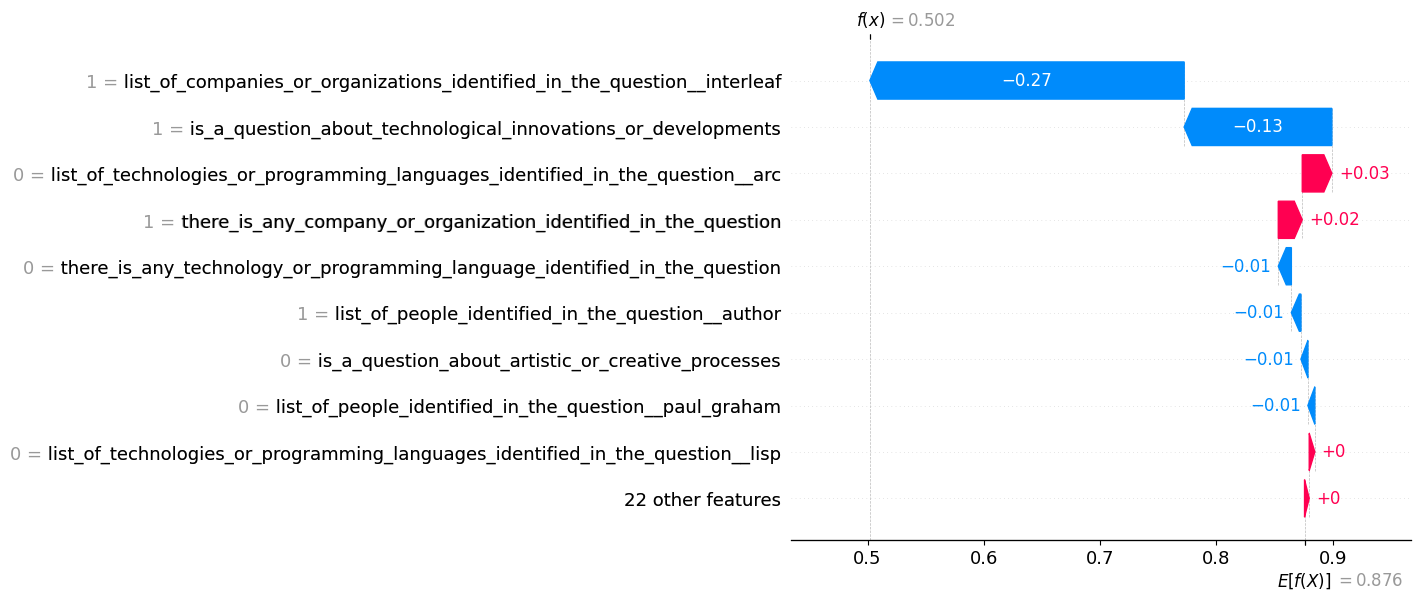

In [12]:
index = 9
shap.waterfall_plot(shap_values[index])